<a href="https://colab.research.google.com/github/escorpio11/programa-python/blob/main/Modulo04/Sesi%C3%B3n_6___ChiquiML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![picture](https://drive.google.com/uc?export=view&id=1KaUW3_JAieeY7WVNfoRiTSr2JsaeAcXi)

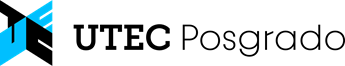

# Módulo 3 - Sesión 6
## Profesor: Germain Garcia Zanabria

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


df = sns.load_dataset('titanic')
df = df.dropna(subset=['survived', 'embarked'])

X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'alone']]
y = df['survived']

num_cols  = ['age', 'sibsp', 'parch', 'fare']
cat_cols  = ['pclass', 'sex', 'embarked', 'alone']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])
preprocess = ColumnTransformer(transformers=[('num', numeric_transformer, num_cols),('cat', categorical_transformer, cat_cols)
])


clf = Pipeline(steps=[('preprocess', preprocess),('model', RandomForestClassifier(n_estimators=200,max_depth=None,class_weight='balanced'))])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

#CONSTRUYENDO EL MODELO
clf.fit(X_train, y_train)



In [ ]:

y_pred = clf.predict(X_test)
print('Classification report:\n',
      classification_report(y_test, y_pred, digits=3))

## Predicción

In [ ]:
def predict_survival(passenger):
    df = pd.DataFrame([passenger])

    # 2. Predicción
    pred_class = clf.predict(df)[0]
    prob_surv  = clf.predict_proba(df)[0, 1]

    return pred_class, prob_surv

In [ ]:
germain = {
    "pclass": 3,#1
    "sex": "male", #woman
    "age": 22, # 35
    "sibsp": 1,
    "parch": 0,
    "fare": 7.25,#71
    "embarked": "S",
    "alone": True
}

y_ggz, p_ggz = predict_survival(germain)
print(f"¿Sobrevive? {y_ggz}  –  Probabilidad: {p_ggz:.2%}")